In [22]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from function_bonus import varimax
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from gensim.models import Word2Vec
import matplotlib.pyplot as plt

### How to select components?

Once PCA has been performed on a dataset, the first two components are typically selected because they explain the most variance. This is particularly crucial when visualizing data in a two-dimensional space. If the original data is complex and multidimensional, reducing it to two dimensions provides a clearer view of the data's structure, facilitating the identification of patterns, trends, or clusters within the data.

When running a clustering algorithm like K-means, the goal is to find groups (clusters) of similar data. However, in a high-dimensional dataset, identifying these groups can be challenging as the distances between points become blurred across many dimensions. By applying PCA, we can reduce the number of variables on which to calculate distance while preserving the dataset's primary structure. The first two principal components represent the directions along which the data varies the most, which can lead to a clearer separation of groups, making the clustering process more effective.

In our case, since it's a PCA performed on two components, there's no need to remove any.

In [24]:
# Apply PCA to reduce dimensionality
pca = PCA(n_components=2)
pca_data = pca.fit_transform(movie_df[pca_features])
explained_variance = pca.explained_variance_ratio_

In [25]:
# select the first two component
print("\n2. PCA - Explained variance by the first two principal component:")
print(f"PC1: {explained_variance[0]:.4f}, PC2: {explained_variance[1]:.4f}")


2. PCA - Explained variance by the first two principal component:
PC1: 0.3668, PC2: 0.1107


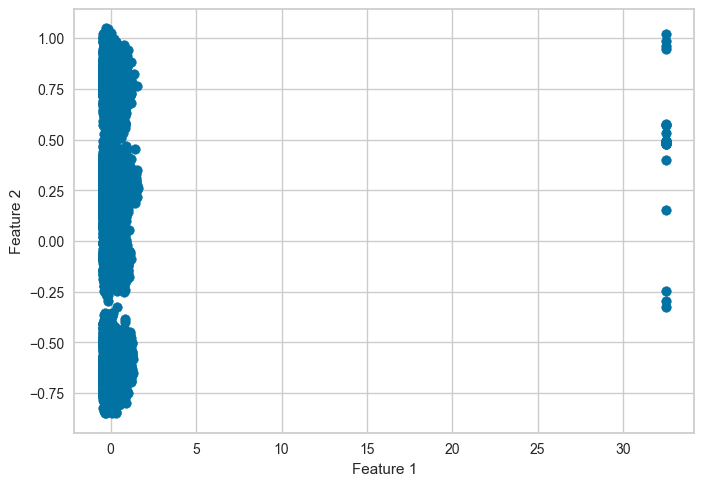

In [26]:
# proceded to delete the outliers
plt.scatter(pca_data[:, 0], pca_data[:, 1])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
pca_df_cleaned = pca_df[pca_df['PC1'] <= 30]
pca_data = pca_df_cleaned[['PC1', 'PC2']].values

Once the two components have been selected, a Varimax rotation is performed. This is a technique used to clarify the relationship between the components and the original variables, thus improving the separation of clusters. Varimax rotation is an orthogonal rotation (components remain uncorrelated) that aims to maximize the variance of the loadings within each component or factor. In other words, Varimax modifies the orientation of the components to make the differences in the contributions of the variables more apparent. In a clustering context, it can improve the distinction between groups of data that would otherwise appear overlapping.

In [27]:
rotated_components = varimax(pca_data)

# print the rotations result
print("\n Principal components after the rotation:")
print(rotated_components[:5]) 


 Principal components after the rotation:
[[-0.77547117  0.62311693]
 [-0.36738246  0.21074092]
 [-0.5772649   0.44679314]
 [-0.00281241 -0.1502602 ]
 [-0.60765532  0.46355067]]


Let's proceed by applying the modified K-Means algorithm in order to observe the different clusters at each iteration.

In [28]:
from function_bonus import k_means

We use the Yellowbrick library to visualize the Elbow Method in order to determine the optimal number of clusters for a clustering model, in this case using KMeans from scikit-learn.

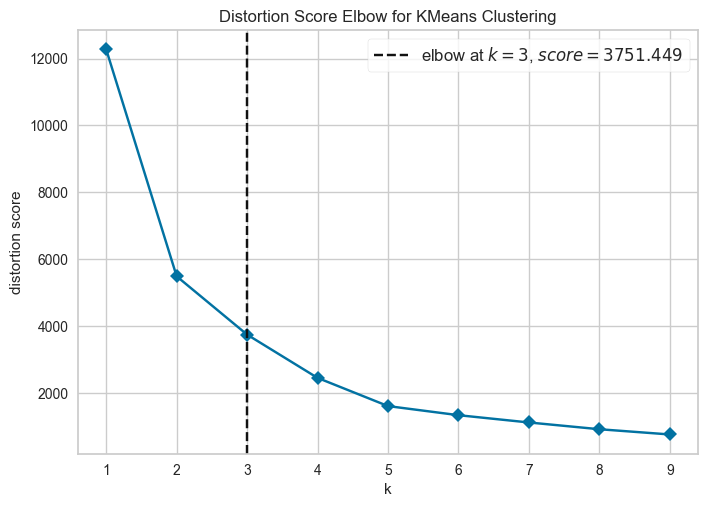

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [29]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10), timings=False)
visualizer.fit(rotated_components) 
visualizer.show()

A GIF will be created to visualize the iterative process of the K-means algorithm.

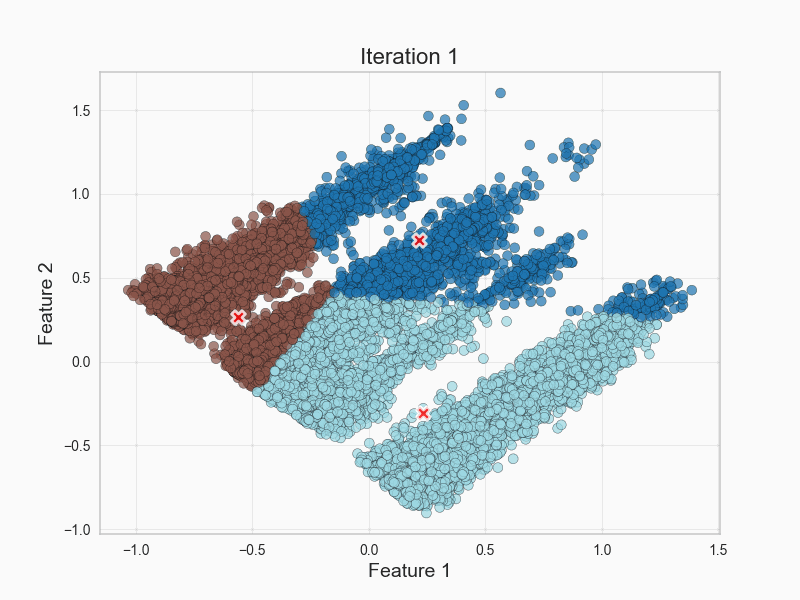

In [30]:
centroids, cluster_labels, plot_objects = k_means(rotated_components, k=3, max_iters=50)